# Regression with scikit-learn and statmodels
This notebook demonstrates how to conduct a valid regression analysis using a combination of Sklearn and statmodels libraries. While **sklearn** is popular and powerful from an operational point of view, it does not provide the detailed metrics required to statistically analyze your model, evaluate the importance of predictors, build or simplify your model.

We use other libraries like `statmodels` or `scipy.stats` to bridge this gap.

**ToC**
 - [Scikit-learn](#Scikit-learn)
 - [Predicting housing prices without data normalization](#Predicting-housing-prices-without-data-normalization)
  - [Exploratory data anslysis](#Exploratory-data-anslysis-(EDA))
  - [Data cleaning](#Data-cleaning)
  - [Train test split](#Train-test-split)
  - [Multiple regression](#Multiple-regression)
  - [Accuracy assessment](#Accuracy-assessment--/-Model-validation)
 - [Predicting housing prices with data normalization and `statsmodels`](#Predicting-housing-prices-with-data-normalization-and-statmodels)
  - [Scale the housing data to Std. normal distribution](#Scale-the-housing-data-to-Std.-Normal-distribution)
  - [Evaluate model parameters using `statsmodels`](Evaluate-model-parameters-using-statsmodels)
  - [Evaluate model using charts](#Evaluate-model-using-charts)
  - [Inverse transform the scaled data and calculate RMSE](#Inverse-Transform-the-scaled-data-and-calculate-RMSE)
 - [Conclusion](#Conclusion)

## Scikit-learn

`Scikit-learn` is one of the science kits for `SciPy` stack. Scikit has a collection of prediction and learning algorithms, grouped into 
 - classification
 - clustering
 - regression
 - dimensionality reduction

Each algorithm follows a typical pattern with a `fit`, `predict` method. In addition you get a set of utility methods that help with splitting datasets into train-test sets and for validating the outputs.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Predicting housing prices without data normalization
### Exploratory data anslysis (EDA)

In [4]:
usa_house = pd.read_csv('../udemy_ml_bootcamp/Machine Learning Sections/Linear-Regression/USA_housing.csv')
usa_house.head(5)

Avg Income  Avg House Age  Avg. Number of Rooms  Avg. Number of Bedrooms  \
0  79545.45857       5.682861              7.009188                     4.09   
1  79248.64245       6.002900              6.730821                     3.09   
2  61287.06718       5.865890              8.512727                     5.13   
3  63345.24005       7.188236              5.586729                     3.26   
4  59982.19723       5.040555              7.839388                     4.23   

   Area Population         Price  \
0      23086.80050  1.059034e+06   
1      40173.07217  1.505891e+06   
2      36882.15940  1.058988e+06   
3      34310.24283  1.260617e+06   
4      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
usa_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg Income                 5000 non-null float64
Avg House Age              5000 non-null float64
Avg. Number of Rooms       5000 non-null float64
Avg. Number of Bedrooms    5000 non-null float64
Area Population            5000 non-null float64
Price                      5000 non-null float64
Address                    5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
usa_house.describe()

Avg Income  Avg House Age  Avg. Number of Rooms  \
count    5000.000000    5000.000000           5000.000000   
mean    68583.108984       5.977222              6.987792   
std     10657.991214       0.991456              1.005833   
min     17796.631190       2.644304              3.236194   
25%     61480.562390       5.322283              6.299250   
50%     68804.286405       5.970429              7.002902   
75%     75783.338665       6.650808              7.665871   
max    107701.748400       9.519088             10.759588   

       Avg. Number of Bedrooms  Area Population         Price  
count              5000.000000      5000.000000  5.000000e+03  
mean                  3.981330     36163.516039  1.232073e+06  
std                   1.234137      9925.650114  3.531176e+05  
min                   2.000000       172.610686  1.593866e+04  
25%                   3.140000     29403.928700  9.975771e+05  
50%                   4.050000     36199.406690  1.232669e+06  
75%                   4.490000     42861.290770  1.471210e+06  
max                   6.500000     69621.713380  2.469066e+06

Find the correlation between each of the numerical columns to the house price

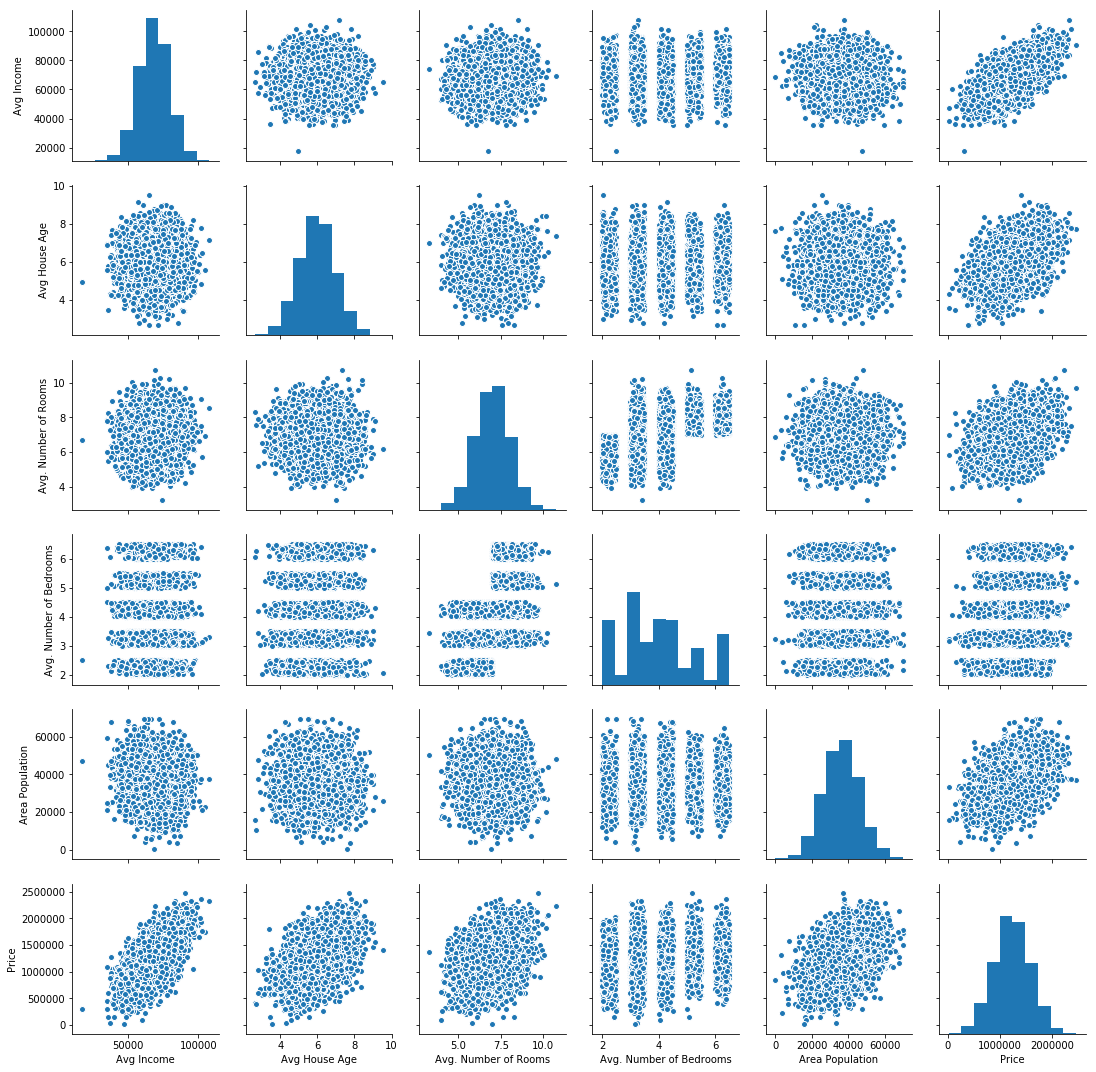

In [6]:
sns.pairplot(usa_house)

From this chart, we now,
 - distribution of house price is normal (last chart)
 - some scatters show a higher correlation, while some other show no correlation.

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


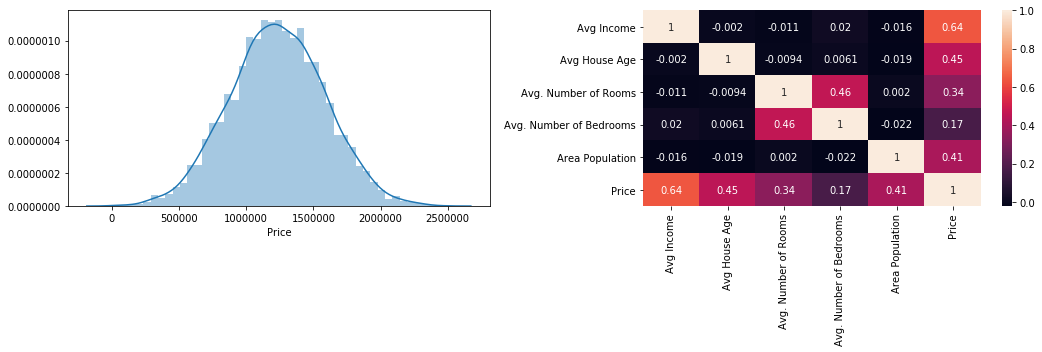

In [7]:
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(usa_house['Price'], ax=axs[0])
sns.heatmap(usa_house.corr(), ax=axs[1], annot=True)
fig.tight_layout()

### Data cleaning
Throw out the text column and split the data into predictor and predicted variables

In [8]:
usa_house.columns

Index(['Avg Income', 'Avg House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
X = usa_house[['Avg Income', 'Avg House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population']]

y = usa_house[['Price']]

#### Train test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
len(X_train)

3350

In [12]:
len(X_test)

1650

In [13]:
X_test.head()

Avg Income  Avg House Age  Avg. Number of Rooms  \
1066  64461.39215       7.949614              6.675121   
4104  61687.39442       5.507913              6.995603   
662   69333.68219       5.924392              6.542682   
2960  74095.71281       5.908765              6.847362   
1604  53066.37227       6.754571              8.062652   

      Avg. Number of Bedrooms  Area Population  
1066                     2.04      34210.93608  
4104                     3.34      45279.16397  
662                      2.00      17187.11819  
2960                     3.00      32774.02197  
1604                     3.23      19103.12711

### Multiple regression
We use a number of numerical columns to regress the house price. Each column's influence will vary, just like in real life, the number of bedrooms might not influence as much as population density. We can determine the influence from the correlation shown in the heatmap above

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#### Fit

In [15]:
lm.fit(X_train, y_train) #no need to capture the return. All is stored in lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Create a table showing the coefficient (influence) of each of the columns

In [16]:
cdf = pd.DataFrame(lm.coef_[0], index=X_train.columns, columns=['coefficients'])
cdf

coefficients
Avg Income                   21.639515
Avg House Age            166094.788683
Avg. Number of Rooms     119855.858430
Avg. Number of Bedrooms    3037.782793
Area Population              15.215241

Note, the coefficients for house age, number of rooms is pretty large. However that does not really mean they are more influential compared to income. It is simply because our dataset has not been normalized and the data range for each of these columns vary widely.

#### Predict

In [17]:
y_predicted = lm.predict(X_test)
len(y_predicted)

1650

### Accuracy assessment  / Model validation

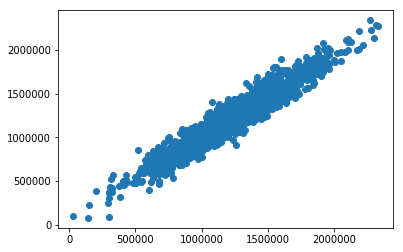

In [18]:
plt.scatter(y_test, y_predicted) #actual vs predicted

#### Distribution of residuals

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


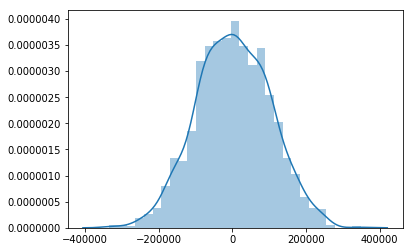

In [19]:
sns.distplot((y_test - y_predicted))

#### Quantifying errors

In [20]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_predicted)

80502.80373530561

RMSE

In [21]:
import numpy
numpy.sqrt(metrics.mean_squared_error(y_test, y_predicted))

99779.47354600814

### Combine the predicted values with input

In [22]:
X_test['predicted_price'] = y_predicted

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
X_test.head()

Avg Income  Avg House Age  Avg. Number of Rooms  \
1066  64461.39215       7.949614              6.675121   
4104  61687.39442       5.507913              6.995603   
662   69333.68219       5.924392              6.542682   
2960  74095.71281       5.908765              6.847362   
1604  53066.37227       6.754571              8.062652   

      Avg. Number of Bedrooms  Area Population  predicted_price  
1066                     2.04      34210.93608     1.396405e+06  
4104                     3.34      45279.16397     1.141590e+06  
662                      2.00      17187.11819     8.904433e+05  
2960                     3.00      32774.02197     1.267610e+06  
1604                     3.23      19103.12711     8.913813e+05

## Predicting housing prices with data normalization and statmodels
As seen earlier, even though sklearn will perform regression, it is hard to compare which of the predictor variables are influential in determining the house price. To answer this better, let us standardize our data to Std. Normal distribution using sklearn preprocessing.

### Scale the housing data to Std. Normal distribution
We use `StandardScaler` from `sklearn.preprocessing` to normalize each predictor to mean `0` and unit variance. What we end up with is `z-score` for each record.

$$
z-score = \frac{x_{i} - \mu}{\sigma}  
$$

In [24]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [25]:
# get all columns except 'Address' which is non numeric
usa_house.columns[:-1]

Index(['Avg Income', 'Avg House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [26]:
usa_house_scaled = s_scaler.fit_transform(usa_house[usa_house.columns[:-1]])
usa_house_scaled = pd.DataFrame(usa_house_scaled, columns=usa_house.columns[:-1])
usa_house_scaled.head()

Avg Income  Avg House Age  Avg. Number of Rooms  Avg. Number of Bedrooms  \
0    1.028660      -0.296927              0.021274                 0.088062   
1    1.000808       0.025902             -0.255506                -0.722301   
2   -0.684629      -0.112303              1.516243                 0.930840   
3   -0.491499       1.221572             -1.393077                -0.584540   
4   -0.807073      -0.944834              0.846742                 0.201513   

   Area Population     Price  
0        -1.317599 -0.490081  
1         0.403999  0.775508  
2         0.072410 -0.490211  
3        -0.186734  0.080843  
4        -0.988387 -1.702518

In [37]:
usa_house_scaled.describe().round(3) # round the numbers for dispaly

Avg Income  Avg House Age  Avg. Number of Rooms  \
count    5000.000       5000.000              5000.000   
mean        0.000         -0.000                -0.000   
std         1.000          1.000                 1.000   
min        -4.766         -3.362                -3.730   
25%        -0.666         -0.661                -0.685   
50%         0.021         -0.007                 0.015   
75%         0.676          0.679                 0.674   
max         3.671          3.573                 3.750   

       Avg. Number of Bedrooms  Area Population     Price  
count                 5000.000         5000.000  5000.000  
mean                    -0.000            0.000     0.000  
std                      1.000            1.000     1.000  
min                     -1.606           -3.626    -3.444  
25%                     -0.682           -0.681    -0.664  
50%                      0.056            0.004     0.002  
75%                      0.412            0.675     0.677  
max                      2.041            3.371     3.503

### Train test split

In [27]:
X_scaled = usa_house_scaled[['Avg Income', 'Avg House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population']]

y_scaled = usa_house_scaled[['Price']]

In [28]:
Xscaled_train, Xscaled_test, yscaled_train, yscaled_test = \
train_test_split(X_scaled, y_scaled, test_size=0.33)

### Train the model

In [29]:
lm_scaled = LinearRegression()
lm_scaled.fit(Xscaled_train, yscaled_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
cdf_scaled = pd.DataFrame(lm_scaled.coef_[0], 
                          index=Xscaled_train.columns, columns=['coefficients'])
cdf_scaled

coefficients
Avg Income                   0.653151
Avg House Age                0.462883
Avg. Number of Rooms         0.341197
Avg. Number of Bedrooms      0.007156
Area Population              0.424653

In [59]:
lm_scaled.intercept_

array([0.00215375])

From the table above, we notice `Avg Income` has more influence on the `Price` than other variables. This was not apparent before scaling the data. Further this corroborates the `correlation` matrix produced during exploratory data analysis.

### Evaluate model parameters using statsmodels
`statmodels` is a different Python library built for and by statisticians. Thus it provides a lot more information on your model than `sklearn`. We use it here to refit against the data and evaluate the strength of fit.

In [33]:
import statsmodels.api as sm
import statsmodels

In [32]:
from statsmodels.regression import linear_model

In [34]:
yscaled_train.shape

(3350, 1)

In [35]:
Xscaled_train = sm.add_constant(Xscaled_train)
sm_ols = linear_model.OLS(yscaled_train, Xscaled_train) # i know, the param order is inverse
sm_model = sm_ols.fit()

In [36]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7446.
Date:                Thu, 23 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:25:05   Log-Likelihood:                -552.85
No. Observations:                3350   AIC:                             1118.
Df Residuals:                    3344   BIC:                             1154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0015      0.005     -0.311      0.756      -0.011       0.008
Avg Income                  0.6532      0.005    129.977      0.000       0.643       0.663
Avg House Age               0.4629      0.005     93.799      0.000       0.453       0.473
Avg. Number of Rooms        0.3412      0.006     61.197      0.000       0.330       0.352
Avg. Number of Bedrooms     0.0072      0.006      1.277      0.202      -0.004       0.018
Area Population             0.4247      0.005     86.506      0.000       0.415       0.434
==============================================================================
Omnibus:                       11.426   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.047
Skew:                           0.023   Prob(JB):                       0.0109
Kurtosis:                       2.750   Cond. No.                         1.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression coefficients are identical between `sklearn` and `statsmodels` libraries. The $R^{2}$ of `0.919` is as high as it gets. This indicates the predicted (train) `Price` varies similar to actual. Another measure of health is the `S` (std. error) and `p-value` of coefficients. The `S` of `Avg. Number of Bedrooms` is as low as other predictors, however it has a high `p-value` indicating a low confidence in predicting its coefficient.

Similar is the `p-value` of the intercept.

### Predict for unkown values

In [37]:
yscaled_predicted = lm_scaled.predict(Xscaled_test)
residuals_scaled = yscaled_test - yscaled_predicted

### Evaluate model using charts
In addition to the numerical metrics used above, we need to look at the distribution of residuals to evaluate if the model.

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


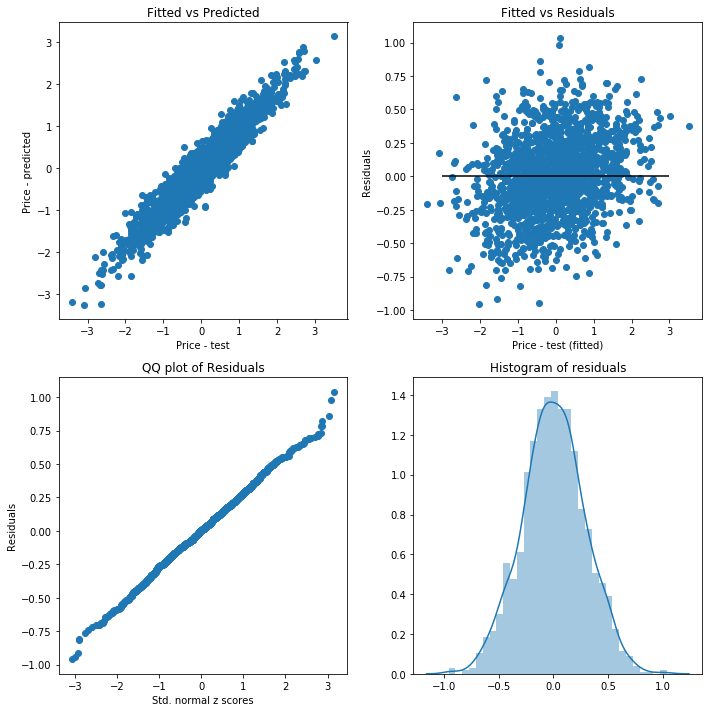

In [42]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
# plt.tight_layout()

plt1 = axs[0][0].scatter(x=yscaled_test, y=yscaled_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price - test')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=yscaled_test, y=residuals_scaled)
axs[0][1].hlines(0, xmin=-3, xmax=3)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

from numpy import random
axs[1][0].scatter(x=sorted(random.randn(len(residuals_scaled))), 
                  y=sorted(residuals_scaled['Price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals_scaled, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()

From the charts above,
 - Fitted vs predicted chart shows a strong correlation between the predictions and actual values
 - Fitted vs Residuals chart shows an even distribution around the `0` mean line. There are not patterns evident, which means our model does not leak any systematic phenomena into the residuals (errors)
 - Quantile-Quantile plot of residuals vs std. normal and the histogram of residual plots show a sufficiently normal distribution of residuals.
 
Thus all assumptions hold good.

### Inverse Transform the scaled data and calculate RMSE

In [45]:
Xscaled_train.columns

Index(['const', 'Avg Income', 'Avg House Age', 'Avg. Number of Rooms',
       'Avg. Number of Bedrooms', 'Area Population'],
      dtype='object')

In [55]:
usa_house_fitted = Xscaled_test[Xscaled_test.columns[0:]]
usa_house_fitted['Price'] = yscaled_test
usa_house_fitted.head()

Avg Income  Avg House Age  Avg. Number of Rooms  \
116    -0.572234       0.523958              0.333009   
1766    0.235111      -1.461858             -0.639184   
318    -0.401314      -1.180810              0.886801   
1376    0.190042      -1.552636              0.291719   
4699   -2.186060      -0.389114             -0.437924   

      Avg. Number of Bedrooms  Area Population     Price  
116                  0.930840        -0.935132 -0.807544  
1766                -0.787131        -0.746915 -1.139124  
318                  0.242031        -0.544216 -0.423747  
1376                -0.503503        -1.186530 -1.552110  
4699                -1.362489         0.903237 -1.453495

In [59]:
usa_house_fitted_inv = s_scaler.inverse_transform(usa_house_fitted)
usa_house_fitted_inv = pd.DataFrame(usa_house_fitted_inv, 
                                    columns=usa_house_fitted.columns)
usa_house_fitted_inv.head().round(3)

Avg Income  Avg House Age  Avg. Number of Rooms  Avg. Number of Bedrooms  \
0   62484.855          6.497                 7.323                     5.13   
1   71088.669          4.528                 6.345                     3.01   
2   64306.339          4.807                 7.880                     4.28   
3   70608.372          4.438                 7.281                     3.36   
4   45286.426          5.591                 6.547                     2.30   

   Area Population        Price  
0        26882.652   946943.036  
1        28750.641   829868.230  
2        30762.360  1082455.018  
3        24387.608   684049.919  
4        45127.832   718869.401

In [65]:
yinv_predicted = (yscaled_predicted * s_scaler.scale_[-1]) + s_scaler.mean_[-1]

In [66]:
yinv_predicted.shape

(1650, 1)

In [67]:
usa_house_fitted_inv['Price predicted'] = yinv_predicted
usa_house_fitted_inv.head().round(3)

Avg Income  Avg House Age  Avg. Number of Rooms  Avg. Number of Bedrooms  \
0   62484.855          6.497                 7.323                     5.13   
1   71088.669          4.528                 6.345                     3.01   
2   64306.339          4.807                 7.880                     4.28   
3   70608.372          4.438                 7.281                     3.36   
4   45286.426          5.591                 6.547                     2.30   

   Area Population        Price  Price predicted  
0        26882.652   946943.036      1087455.848  
1        28750.641   829868.230       855848.404  
2        30762.360  1082455.018       971840.851  
3        24387.608   684049.919       877566.569  
4        45127.832   718869.401       743023.886

### Calculate RMSE
RMSE root mean squared error. This is useful as it tell you in terms of the dependent variable, what the mean error in prediction is.

In [68]:
mse_scaled = metrics.mean_squared_error(usa_house_fitted_inv['Price'], 
                           usa_house_fitted_inv['Price predicted'])
numpy.sqrt(mse_scaled)

101796.27442079457

In [69]:
mae_scaled = metrics.mean_absolute_error(usa_house_fitted_inv['Price'], 
                           usa_house_fitted_inv['Price predicted'])
mae_scaled

80765.04773907141

## Conclusion
In this sample we observed two methods of predicting housing prices. The first involved applying linear regression on the dataset directly. The second involved scaling the features to standard normal distribution and applying a linear model using both `sklearn` and `statsmodels` packages. We thoroughly inspected the model parameters, vetted that assumptions hold good.

In the end, the accuracy of the models did not increase much after scaling. However, we were able to better determine which predictor variables were influential in a truest sense, not being biased by the scale of the units.

The allure of linear models is the explainability. They may not be the best when it comes to accurate predictions, however they help us answer basic questions better, such as "which characteristics influence the cost of my home, is it # of bedrooms or average income of the residents"?. The answer is the latter in this example.